<a href="https://colab.research.google.com/github/dead96pool/stress_detection_mlai/blob/main/MLAI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



# Data cleaning

In [2]:
# git repo clone
!git clone https://github.com/dead96pool/datasets
# removing the clone
#!rm -rf datasets

Cloning into 'datasets'...
remote: Enumerating objects: 2817, done.
remote: Counting objects: 100% (1402/1402), done.
remote: Compressing objects: 100% (1388/1388), done.
remote: Total 2817 (delta 10), reused 1401 (delta 9), pack-reused 1415
Receiving objects: 100% (2817/2817), 65.32 MiB | 34.55 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Filtering content: 100% (1357/1357), 853.65 MiB | 24.06 MiB/s, done.


In [3]:
calm_path = "/content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/CALM/"
stress_path = "/content/datasets/machine_learning/mlai_project/2019_stress_detection_dataset/STRESS/"

In [4]:
column_names = [
    'participant_id', 'age', 'gender', 'key_press_count', 'delete_key_press_count',
    'text_id', 'text_length', 'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
    'accelerometer_magnitude', 'gravity_x', 'gravity_y', 'gravity_z', 'gravity_magnitude',
    'linear_acceleration_x', 'linear_acceleration_y', 'linear_acceleration_z',
    'linear_acceleration_magnitude',
    'gyroscope_x', 'gyroscope_y', 'gyroscope_z', 'gyroscope_magnitude',
    'magnetometer_x', 'magnetometer_y', 'magnetometer_z', 'magnetometer_magnitude',
    'light_sensor', 'proximity_sensor',
    'game_rotation_vector_x', 'game_rotation_vector_y', 'game_rotation_vector_z',
    'game_rotation_vector_magnitude',
    'rotation_sensor_x', 'rotation_sensor_y', 'rotation_sensor_z', 'rotation_sensor_scalar',
    'rotation_sensor_value',
    'rotation_sensor_magnitude',
    'orientation_azimuth', 'orientation_pitch', 'orientation_roll', 'orientation_sensor_magnitude',
    'number_of_steps'
]

In [5]:
# file names are in the format : CALMorSTRESS_{participant_id}_{text_id}
#file_1 = "CALM_1_1.csv"
#file_2 = "CALM_1_2.csv"
#calm_df_1 = pd.read_csv(calm_path+file_1, sep=';', names=column_names)
#calm_df_2 = pd.read_csv(calm_path+file_2, sep=';', names=column_names)

In [6]:
# looping throught the calm folder to combine all the CALM files
calm_pattern = calm_path + "CALM_*.csv"
calm_files = glob.glob(calm_pattern)

calm_df = []

for file in calm_files:
    df = pd.read_csv(file, sep=';', names=column_names, usecols=range(44))
    calm_df.append(df)


In [7]:
# looping throught the calm folder to combine all the STRESS files
stress_pattern = stress_path + "STRESS_*.csv"
stress_files = glob.glob(stress_pattern)

stress_df = []

for file in calm_files:
    df = pd.read_csv(file, sep=';', names=column_names, usecols=range(44))
    stress_df.append(df)


In [8]:

# combining all the calm files
calm_combine_df = pd.concat(calm_df, axis=0, ignore_index= True)

In [9]:

# combining all the stress files
stress_combine_df = pd.concat(stress_df, axis=0, ignore_index= True)

In [10]:
# 0 is calm
# 1 is stressed
calm_combine_df["stress"] = 0
stress_combine_df["stress"] = 1

In [11]:

display(calm_combine_df.sort_values(by='participant_id'))

,participant_id,age,gender,key_press_count,delete_key_press_count,text_id,text_length,accelerometer_x,accelerometer_y,accelerometer_z,...,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_value,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude,number_of_steps,stress
465430,1,30,Male,1,0,1,27,-1.398295,4.552336,8.461134,...,-0.300669,0.918815,0.174533,1.015117,33.908630,-28.277462,-9.235774,45.107754,14.0,0
146727,1,30,Male,73,0,4,100,-0.653303,4.759766,8.461175,...,-0.301378,0.917899,0.174533,1.015117,35.205505,-29.631193,-4.338681,46.219690,14.0,0
146728,1,30,Male,73,0,4,100,-0.653303,4.759766,8.461175,...,-0.301378,0.917899,0.174533,1.015117,35.205505,-29.631193,-4.338681,46.219690,14.0,0
146729,1,30,Male,74,0,4,100,-0.537763,4.757576,8.541917,...,-0.301378,0.917899,0.174533,1.015117,35.205505,-29.631193,-4.338681,46.219690,14.0,0
146730,1,30,Male,74,0,4,100,-0.654276,4.805374,8.503541,...,-0.298094,0.917906,0.174533,1.015117,34.637146,-29.986156,-5.021699,46.088165,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104743,110,21,Male,51,7,4,100,0.495615,8.825297,4.829252,...,0.605341,0.589818,0.000000,0.999999,267.765750,-64.535324,2.122238,275.441100,0.0,0
104744,110,21,Male,51,7,4,100,0.495615,8.825297,4.829252,...,0.605341,0.589818,0.000000,0.999999,267.765750,-64.535324,2.122238,275.441100,0.0,0
104745,110,21,Male,51,7,4,100,0.627300,8.844451,4.474900,...,0.606367,0.593224,0.000000,0.999999,267.937200,-63.852325,2.310793,275.450160,0.0,0
104747,110,21,Male,51,7,4,100,0.562655,8.753469,4.805310,...,0.608049,0.593108,0.000000,0.999999,267.749630,-63.605503,2.366911,275.211060,0.0,0


In [12]:
display(stress_combine_df.sort_values(by='participant_id'))

,participant_id,age,gender,key_press_count,delete_key_press_count,text_id,text_length,accelerometer_x,accelerometer_y,accelerometer_z,...,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_value,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude,number_of_steps,stress
465430,1,30,Male,1,0,1,27,-1.398295,4.552336,8.461134,...,-0.300669,0.918815,0.174533,1.015117,33.908630,-28.277462,-9.235774,45.107754,14.0,1
146727,1,30,Male,73,0,4,100,-0.653303,4.759766,8.461175,...,-0.301378,0.917899,0.174533,1.015117,35.205505,-29.631193,-4.338681,46.219690,14.0,1
146728,1,30,Male,73,0,4,100,-0.653303,4.759766,8.461175,...,-0.301378,0.917899,0.174533,1.015117,35.205505,-29.631193,-4.338681,46.219690,14.0,1
146729,1,30,Male,74,0,4,100,-0.537763,4.757576,8.541917,...,-0.301378,0.917899,0.174533,1.015117,35.205505,-29.631193,-4.338681,46.219690,14.0,1
146730,1,30,Male,74,0,4,100,-0.654276,4.805374,8.503541,...,-0.298094,0.917906,0.174533,1.015117,34.637146,-29.986156,-5.021699,46.088165,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104743,110,21,Male,51,7,4,100,0.495615,8.825297,4.829252,...,0.605341,0.589818,0.000000,0.999999,267.765750,-64.535324,2.122238,275.441100,0.0,1
104744,110,21,Male,51,7,4,100,0.495615,8.825297,4.829252,...,0.605341,0.589818,0.000000,0.999999,267.765750,-64.535324,2.122238,275.441100,0.0,1
104745,110,21,Male,51,7,4,100,0.627300,8.844451,4.474900,...,0.606367,0.593224,0.000000,0.999999,267.937200,-63.852325,2.310793,275.450160,0.0,1
104747,110,21,Male,51,7,4,100,0.562655,8.753469,4.805310,...,0.608049,0.593108,0.000000,0.999999,267.749630,-63.605503,2.366911,275.211060,0.0,1


In [13]:
print(calm_combine_df.isnull().sum())
print(calm_combine_df.info())

participant_id                    0
age                               0
gender                            0
key_press_count                   0
delete_key_press_count            0
text_id                           0
text_length                       0
accelerometer_x                   0
accelerometer_y                   0
accelerometer_z                   0
accelerometer_magnitude           0
gravity_x                         0
gravity_y                         0
gravity_z                         0
gravity_magnitude                 0
linear_acceleration_x             0
linear_acceleration_y             0
linear_acceleration_z             0
linear_acceleration_magnitude     0
gyroscope_x                       0
gyroscope_y                       0
gyroscope_z                       0
gyroscope_magnitude               0
magnetometer_x                    0
magnetometer_y                    0
magnetometer_z                    0
magnetometer_magnitude            0
light_sensor                

In [14]:
# finding unique participant values
print(sorted(calm_combine_df["participant_id"].unique()))
print(len(calm_combine_df["participant_id"].unique()))

print(sorted(stress_combine_df["participant_id"].unique()))
print(len(stress_combine_df["participant_id"].unique()))

print(sorted(calm_combine_df["stress"].unique()))
print(len(calm_combine_df["stress"].unique()))

print(sorted(stress_combine_df["stress"].unique()))
print(len(stress_combine_df["stress"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
110
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
110
[0]
1
[1]
1


In [15]:
print(stress_combine_df.isnull().sum())
print(stress_combine_df.info())

participant_id                    0
age                               0
gender                            0
key_press_count                   0
delete_key_press_count            0
text_id                           0
text_length                       0
accelerometer_x                   0
accelerometer_y                   0
accelerometer_z                   0
accelerometer_magnitude           0
gravity_x                         0
gravity_y                         0
gravity_z                         0
gravity_magnitude                 0
linear_acceleration_x             0
linear_acceleration_y             0
linear_acceleration_z             0
linear_acceleration_magnitude     0
gyroscope_x                       0
gyroscope_y                       0
gyroscope_z                       0
gyroscope_magnitude               0
magnetometer_x                    0
magnetometer_y                    0
magnetometer_z                    0
magnetometer_magnitude            0
light_sensor                

In [16]:
# combining the stress and the calm dataframes together

combined_df = pd.concat([calm_combine_df, stress_combine_df], ignore_index = True, axis = 0)

In [17]:
display(combined_df.sort_values(by="participant_id"))

,participant_id,age,gender,key_press_count,delete_key_press_count,text_id,text_length,accelerometer_x,accelerometer_y,accelerometer_z,...,rotation_sensor_z,rotation_sensor_scalar,rotation_sensor_value,rotation_sensor_magnitude,orientation_azimuth,orientation_pitch,orientation_roll,orientation_sensor_magnitude,number_of_steps,stress
764782,1,30,Male,42,9,3,66,-0.645072,4.949823,8.349850,...,-0.296389,0.916630,0.174533,1.015117,34.642334,-30.844381,-4.328246,46.585415,14.0,1
850169,1,30,Male,33,0,4,100,-0.743972,4.826334,8.636381,...,-0.291008,0.919887,0.174533,1.015117,33.672120,-30.057167,-5.351007,45.451930,14.0,1
850168,1,30,Male,33,0,4,100,-0.743972,4.826334,8.636381,...,-0.291008,0.919887,0.174533,1.015117,33.672120,-30.057167,-5.351007,45.451930,14.0,1
850167,1,30,Male,32,0,4,100,-0.743972,4.826334,8.636381,...,-0.291008,0.919887,0.174533,1.015117,33.672120,-30.057167,-5.351007,45.451930,14.0,1
850166,1,30,Male,32,0,4,100,-0.572096,4.837061,8.647013,...,-0.291008,0.919887,0.174533,1.015117,33.672120,-30.057167,-5.351007,45.451930,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596298,110,21,Male,83,10,6,83,0.976864,8.813326,4.996851,...,0.580814,0.651209,0.000000,0.999999,275.418950,-58.308880,3.441133,281.544600,0.0,0
596297,110,21,Male,83,10,6,83,-0.277736,8.533195,5.825271,...,0.589194,0.641671,0.000000,0.999999,274.151920,-58.744360,2.230533,280.383940,0.0,0
596296,110,21,Male,83,10,6,83,-0.277736,8.533195,5.825271,...,0.589194,0.641671,0.000000,0.999999,274.151920,-58.744360,2.230533,280.383940,0.0,0
596194,110,21,Male,76,10,6,83,0.691945,8.645726,4.644893,...,0.567184,0.641806,0.000000,0.999999,276.250700,-62.052372,2.373132,283.144100,0.0,0


In [18]:
# Encode the 'gender' column using LabelEncoder
label_encoder = LabelEncoder()
combined_df['gender'] = label_encoder.fit_transform(combined_df['gender'])


In [19]:
# Print the mapping between original categorical values and numerical labels
print("Mapping of original values to numerical labels:")
for original_value, numerical_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {numerical_label}")

Mapping of original values to numerical labels:
Female: 0
Male: 1


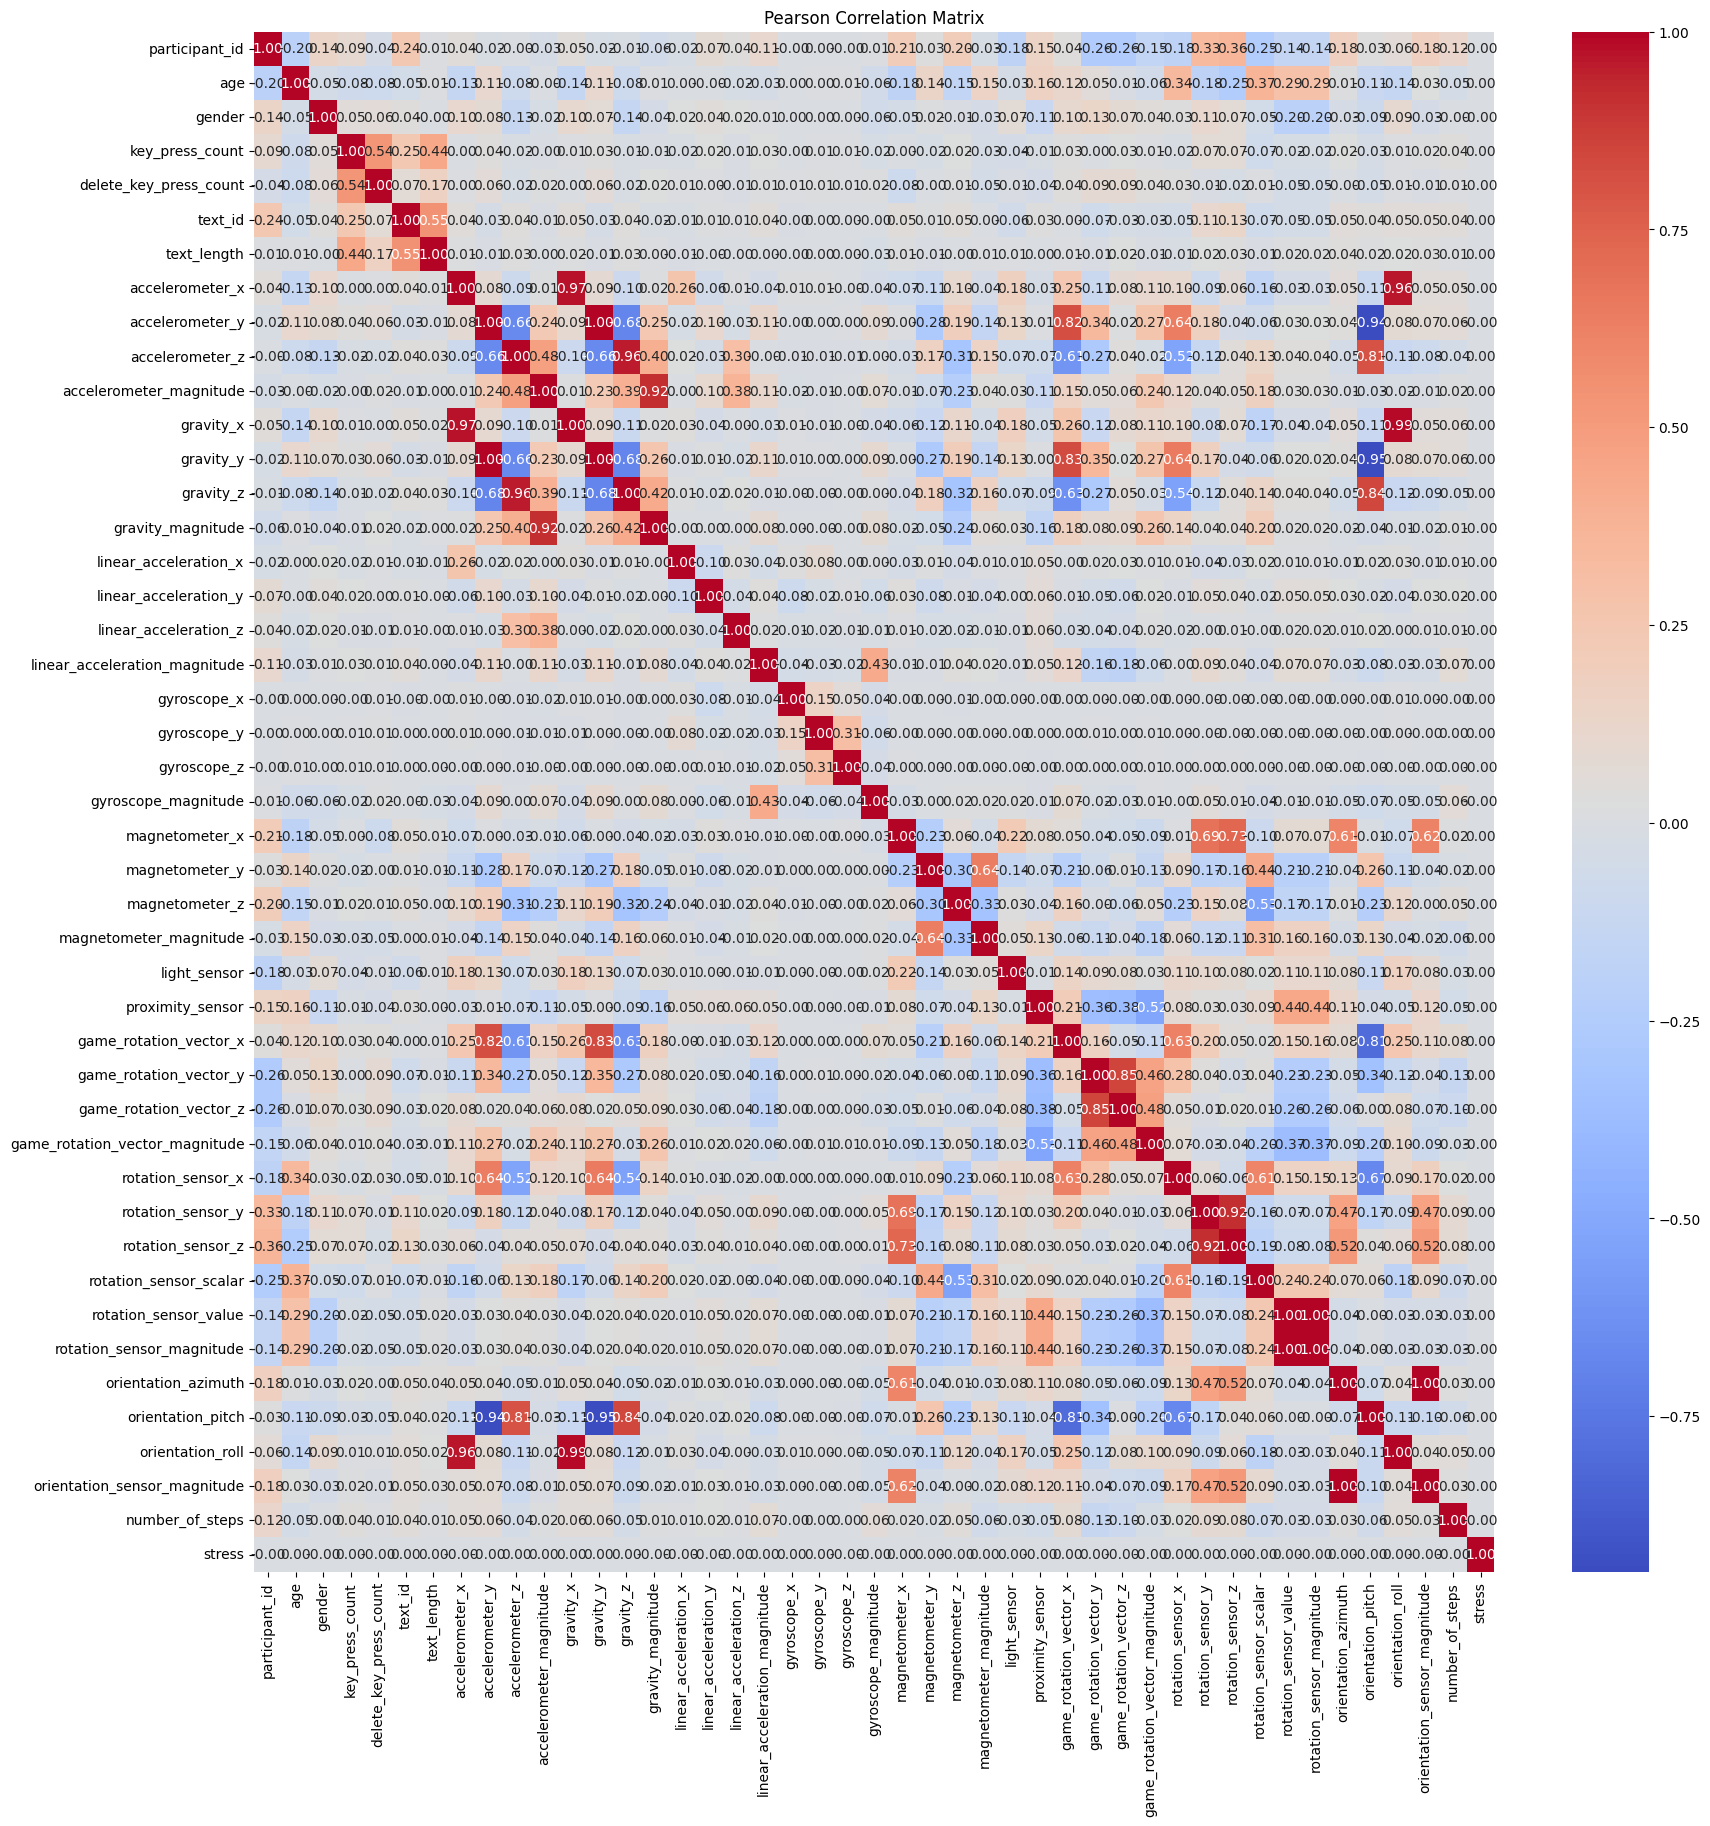

In [20]:
# pearse correlation matrix
correlation_matrix = combined_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Pearson Correlation Matrix')

# Show plot
plt.show()

# ML model

In [21]:
# spliting target class
X = combined_df.drop('stress', axis=1)  # Features
y = combined_df['stress']  # Target variable


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping the data for CNN input (assuming each row represents a sample)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)


In [37]:
# Defining the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
# Define early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
17610/17610 [==============================] - 88s 5ms/step - loss: 0.6933 - accuracy: 0.4993 - val_loss: 0.6933 - val_accuracy: 0.4983
Epoch 2/10
17610/17610 [==============================] - 85s 5ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 3/10
17610/17610 [==============================] - 86s 5ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 4/10
17610/17610 [==============================] - 85s 5ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4980
Epoch 5/10
17610/17610 [==============================] - 84s 5ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 6/10
17610/17610 [==============================] - 86s 5ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 7/10
17610/17610 [==============================] - 83s 5ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0

KeyboardInterrupt: 

In [41]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

8805/8805 [==============================] - 31s 3ms/step - loss: 0.6933 - accuracy: 0.4980
Test Loss: 0.6932689547538757, Test Accuracy: 0.4980337917804718


NameError: name 'history' is not defined